# Capstone : Default Risk Prediction Algorithm for Peer to Peer platform Investor

----------
## Executive Summary

Peer-to-peer lending websites, like Lending Club and RenRenDai (人人贷), connect borrowers directly to lenders, known as investors, who loan money to qualified applicants. It’s an alternative to borrowing money from a bank or a more traditional online lender. Each website sets the rates and the terms (sometimes with investor input) and enables the transaction. 

The best peer-to-peer lending websites offer multiple types of loans and have competitive interest rates and low fees. They have varying minimum and maximum loan amounts and lend money for a variety of different reasons. The best sites have a streamlined application process and highlight their borrower qualifications upfront. 

![](image/peer-to-peer-lending.png)

Although most P2P lending platform provides credit scoring (predict the default risk of borrowers) capability against all borrowers who registered on their platform, it may still be useful to develop a classification model not only to predicts default risk of individual but also to rank order risk so that it can assist sophisticated investor to manage their own risk appetite and allocate lending funds wisely within a diverfied portfolio.  This is also achievable especially with the availability of borrower's credit history and rich source of data on most P2P platform.

![](image/p2p.png)

As recent as year 2018, due to the tightening of financial regulation as the P2P industry was fast creating a systematic risk in China, alot of P2P platform went out of business.  This episode served as a lesson to most investor and it pays to know the borrower of the platform well.

## Problem Statement

As explained above, with the availability of borrower's credit history data, the goal of the project is to find solutions to the following problem area faced by P2P investor:

1. To build an interpretable classification model, leveraging on P2P platform dataset, that predicts the default risk of each potential borrower and enable investor to make the right funding decision depending on their risk appetite. I will leverage on traditional credit risk model development methodology practised in the financial market for more than 3 decades.

2. Not only focusing on model accuracy, but also emphasize the interpretability of the model by leveraging traditional credit scoring technology as well as interpretability package like LIME


## Contents:

### Data Cleaning 

1. [Importing Libraries](#1.-Importing-Libraries)
2. [Importing Data](#2.-Importing-Data)
3. [Data Cleaning](#3.-Data-Cleaning)
-------

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
# Display full output 
#pd.set_option('display.max_rows', 500)
sns.set
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', None)

## 2. Importing Data

In [2]:
loan_data = pd.read_csv("./data/loan_data_2007_2014.csv", low_memory=False)

In [3]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### <u>Data Dictionary</u>

In [5]:
field_describe = pd.read_excel('./data/LCDataDictionary.xlsx')
field_describe.style.set_properties(subset=['Description'], **{'width': '1000px'})

C:\Users\weeho\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,LoanStatNew,Description,Unnamed: 2
0,addr_state,The state provided by the borrower in the loan application,nan
1,annual_inc,The self-reported annual income provided by the borrower during registration.,nan
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration,nan
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers,nan
4,collection_recovery_fee,post charge off collection fee,nan
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections,nan
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,nan
7,desc,Loan description provided by the borrower,nan
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.",nan
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income",nan


Note: 

Some of the columns are basically all missing values, shall drop the respective columns

## 3. Data Cleaning

#### <u>Removing Extraneous Columns</u>
As there are quite a number of columns which has 100% missing value and I shall drop them here.

In [6]:
loan_data.shape

(466285, 75)

In [7]:
loan_data = loan_data.dropna(how = 'all', axis = 1)

In [8]:
loan_data.shape

(466285, 58)

In [9]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [10]:
# generate initial statistics
loan_data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


Note: Too many columns here, but from stats computed above, I observed most relevant continuous columns (excluding running number like id which will be removed subsequently) makes economic sense like interest rate (which has a maximum of 26% and average of 13.8%).  However, for some columns, need to investigate further.  For example, for annual income, we can see a maxium of 7.5 million and why would such borrower exist on this platform..  Doesn't make sense.  Further looking into the loan amount, we have a maxium of USD35,000 and average of USD14,317.  The ratios doesn't add up here.  Shall perform further investigation shortly on these columns.

#### <u>Check if columns are imported in the correct datatype</u>

List out all the columns of object type and check against data dictionary

In [11]:
loan_data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

Note: Checking against the data dictionary, the following columns should either be a categorical or numerical features and need to convert them to the correct datatype.

1. "term" - this is a categorical features and it is either 36 months or 60 months
2. "grade" - this is a categorical features
3. "sub_grade" - this is a categorical features
4. "emp_title" - this is a categorical features
5. "emp_length" - this should be a numerical features but I will probably convert it into categorical 
6. "home_ownership" - this is a categorical features
7. "verification_status" - this is a categorical features
8. "issue_d" - this has to be converted to date time
9. "loan_status" - this is the target label and will be converted to either "1" or "0"
10. "pymnt_plan" - this should be a categorical features
11. "url" - this will be removed as it doesn't carry any information value for our problem statement
12. "desc" - this is text and likely to drop
13. "purpose" - this should be categorical
14. "title" - this is text and need to investigate to see if it is useful
15. "zip_code" - this is location information, leave it as it is
16. "addr_state" - same as above
17. "earliest_cr_line" - this should be date time field
18. "initial_list_status" - this is categorical field
19. "last_pymnt_d" - this should be a date time field but likely to remove because this information wouldn't be available at the point of decision making by the investor to fund the loan or not.  This information is only available after the loan is funded.
20. "next_pymnt_d" - similar nature as above field
21. "last_credit_pull_d" - this should be a date time field
22. "application_type" - this is a categorical field

In [12]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


#### <u>Firstly, to remove all running identification number which won't useful</u>

These columns will be removed:

1. "Unnamed:0" - I believed this column has been imported wrongly for some reason.
2. "id" - I believed it is some running number within Lending Club dataset
3. "member_id" - this is membership id and before we removed, I would like to check the following information

In [13]:
pd.Series(loan_data["member_id"]).is_unique

True

Note: By checking "member_id", we confirm that each record in the dataset belongs to a unique individual or borrower and it does not contain multiple credit record of any individual, which may be possible and may complicates our analysis.  Good thing it isn't.

In [14]:
loan_data = loan_data.drop(['Unnamed: 0', 'member_id', 'id'], axis=1)

In [15]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


#### <u>These are additional columns that needs to be removed</u>

These columns are removed either they contain no information value or they belongs to "future" information after the loan were funded which are not available at the point of investor's decisioning:

|Feature|Description|Reason to remove|
|---|---|---|
|**funded_amnt**|Amount of the loan that was funded by investors and Lending Club|This is a future information| 
|**funded_amnt_inv**|Amount of the loan investors funded|This is a future information| 
|**issue_d**|The month which loan was funded|This is a future information but I am keeping it for now for analysis of loan information at different time period| 
|**url**|A URL link to the loan|This url does not contain information value| 
|**desc**|Description of loan purpose by borrower|As I won't be doing text analysis since there are many missing data| 
|**out_prncp**|Outstanding principal|This is a future information| 
|**out_prncp_inv**|Outstanding principal investors portion of fund|This is a future information|
|**total_pymnt**|Payments received to date on loan funded|This is a future information| 
|**total_pymnt_inv**|Payments received to date on loan funded|This is a future information| 
|**total_rec_prncp**|Principal received to date|This is a future information| 
|**total_rec_int**|Interest received to date|This is a future information| 
|**total_rec_late_fee**|Recovered late fees|This is a future information| 
|**recoveries**|Post charge off gross recoveries|This is a future information| 
|**collection_recovery_fee**|Post charge off collection fee|This is a future information|
|**last_pymnt_d**|The date the last payment was received|This is a future information| 
|**last_pymnt_amnt**|The most recent payment amount|This is a future information| 
|**last_credit_pull_d**|The date of last credit pull by LC|This is a future information|
|**collections_12_mths_ex_med**|Number of collections in 12 months excluding medical collections|This is a future information|
|**policy_code**|publicly available policy_code=1,new products not publicly available policy_code=2|This information carry no value| 

In [16]:
cols_to_drop = ['funded_amnt', 'funded_amnt_inv', 'url', 'desc',
                'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                'collections_12_mths_ex_med', 'policy_code']
 
# dropping the columns listed above  
loan_data = loan_data.drop(cols_to_drop, axis=1)

In [17]:
loan_data.shape

(466285, 36)

In [18]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'next_pymnt_d',
       'mths_since_last_major_derog', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [19]:
loan_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [20]:
loan_data['title'].unique()

array(['Computer', 'bike', 'real estate business', ..., 'LoanGetter',
       'Consolidation 01', 'Paying off the car and some bills'],
      dtype=object)

In [21]:
#unlike employment title, title seems free-text, need to drop
loan_data = loan_data.drop('title', axis=1)

#### <u>Define a module to deal with outlier for continuous variable</u>

In [22]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### <u>Cleaning date related columns</u>

In [23]:
#process "term" column - these are the term whereby loan has to be fully paid in installment manner
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [24]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [25]:
loan_data['term_int'].head()

0     36
1     60
2     36
3     36
4     60
Name: term_int, dtype: object

In [26]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [27]:
loan_data['term_int'].dtype

dtype('int64')

In [28]:
loan_data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [29]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [30]:
loan_data['issue_d_year'] = loan_data['issue_d_date'].dt.year
loan_data['issue_d_month'] = loan_data['issue_d_date'].dt.to_period('M')

In [31]:
loan_data['issue_d_month'].head()

0    2011-12
1    2011-12
2    2011-12
3    2011-12
4    2011-12
Name: issue_d_month, dtype: period[M]

In [32]:
loan_data.sort_values(by='issue_d_month', inplace=True)

In [33]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_int,issue_d_date,issue_d_year,issue_d_month
42516,1400,36 months,10.91,45.78,C,C3,"Stanford University Libraries, LOCKSS Project",< 1 year,RENT,40000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,other,MO,8.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,f,Aug-10,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
39785,7500,36 months,13.75,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,debt_consolidation,MA,14.29,1.0,Oct-03,0.0,11.0,0.0,7.0,0.0,4175,51.5,8.0,f,NaN,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
42512,6000,36 months,10.59,195.28,C,C2,Yale University,< 1 year,RENT,20000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,CT,12.90,0.0,Jan-96,4.0,45.0,0.0,5.0,0.0,13660,66.0,6.0,f,Jul-10,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
42513,4400,36 months,9.64,141.25,B,B4,Brick Township board of education,2 years,MORTGAGE,30000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,NJ,3.72,0.0,Jul-04,0.0,0.0,0.0,4.0,0.0,3493,63.5,5.0,f,Jul-10,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
42514,1200,36 months,9.01,38.17,B,B2,Classic Components,< 1 year,RENT,36000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,other,TX,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,f,Jul-10,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,36,2007-06-01,2007,2007-06


Text(0.5, 1.0, 'Loan Issued Distribution by Month-Year')

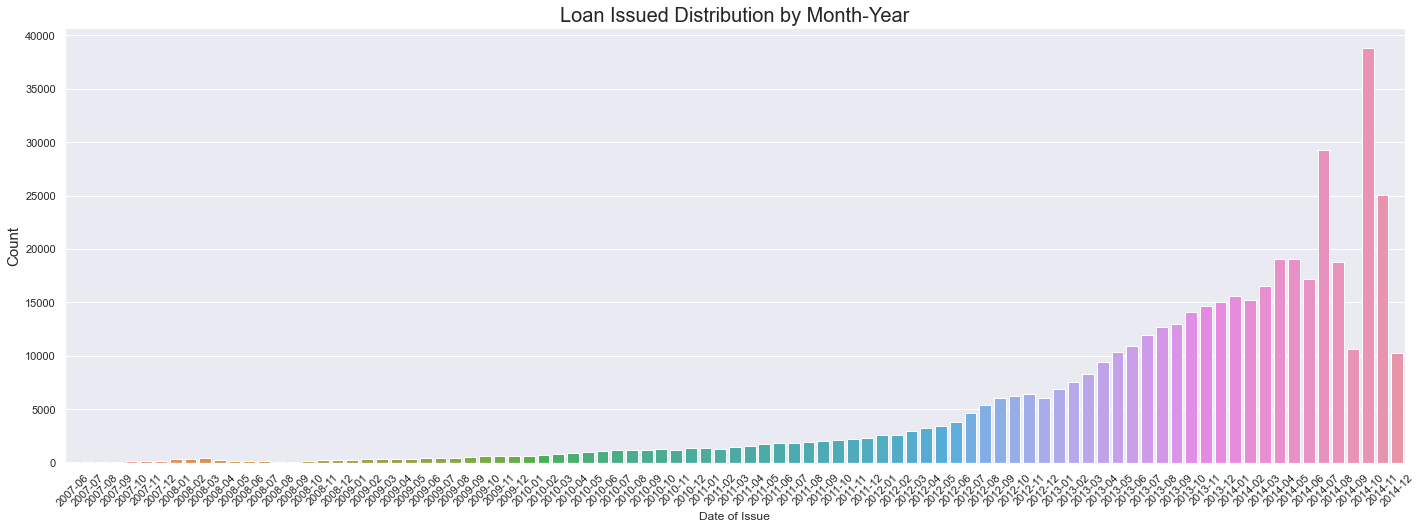

In [34]:
sns.set()
plt.figure(figsize = (24,8))
g = sns.countplot(x="issue_d_month", data=loan_data)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Date of Issue", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Issued Distribution by Month-Year", fontsize=20)

Comment:

In [35]:
loan_data[loan_data['issue_d_month'] < '2009-12']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_int,issue_d_date,issue_d_year,issue_d_month
42516,1400,36 months,10.91,45.78,C,C3,"Stanford University Libraries, LOCKSS Project",< 1 year,RENT,40000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,other,MO,8.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,f,Aug-10,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
39785,7500,36 months,13.75,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,debt_consolidation,MA,14.29,1.0,Oct-03,0.0,11.0,0.0,7.0,0.0,4175,51.5,8.0,f,NaN,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
42512,6000,36 months,10.59,195.28,C,C2,Yale University,< 1 year,RENT,20000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,CT,12.90,0.0,Jan-96,4.0,45.0,0.0,5.0,0.0,13660,66.0,6.0,f,Jul-10,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
42513,4400,36 months,9.64,141.25,B,B4,Brick Township board of education,2 years,MORTGAGE,30000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,NJ,3.72,0.0,Jul-04,0.0,0.0,0.0,4.0,0.0,3493,63.5,5.0,f,Jul-10,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
42514,1200,36 months,9.01,38.17,B,B2,Classic Components,< 1 year,RENT,36000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,other,TX,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,f,Jul-10,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,36,2007-06-01,2007,2007-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40889,16000,36 months,12.87,538.14,C,C1,El Camino Hospital,4 years,OWN,108000.0,Not Verified,Nov-09,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,CA,22.31,0.0,Mar-94,1.0,NaN,NaN,21.0,0.0,110886,42.1,34.0,f,Dec-12,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2009-11-01,2009,2009-11
40914,24000,36 months,14.26,823.34,C,C5,NaN,1 year,RENT,250000.0,Not Verified,Nov-09,Does not meet the credit policy. Status:Charge...,n,home_improvement,CA,3.62,0.0,Nov-00,5.0,NaN,NaN,4.0,0.0,33575,83.9,21.0,f,Apr-10,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2009-11-01,2009,2009-11
34516,11000,36 months,14.61,379.23,D,D1,santa clara county library,10+ years,RENT,45000.0,Not Verified,Nov-09,Fully Paid,n,debt_consolidation,CA,12.00,0.0,Feb-86,0.0,24.0,NaN,8.0,0.0,9311,40.5,15.0,f,NaN,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2009-11-01,2009,2009-11
34517,11000,36 months,8.59,347.72,A,A4,Dorchester County Commissioners,10+ years,RENT,21000.0,Not Verified,Nov-09,Charged Off,n,debt_consolidation,MD,16.46,0.0,Nov-99,1.0,NaN,NaN,7.0,0.0,4372,21.1,18.0,f,NaN,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,36,2009-11-01,2009,2009-11


In [36]:
loan_data['emp_length'].unique()

array(['< 1 year', '2 years', '10+ years', '9 years', '1 year', '6 years',
       '3 years', '7 years', '8 years', '4 years', '5 years', nan],
      dtype=object)

In [37]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

<ipython-input-37-5691ebf6c40a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [38]:
loan_data['emp_length_int'].unique()

array(['0', '2', '10', '9', '1', '6', '3', '7', '8', '4', '5', nan],
      dtype=object)

In [39]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [40]:
loan_data['emp_length_int'].dtype

dtype('float64')

In [41]:
loan_data['emp_length_int'].describe()

count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

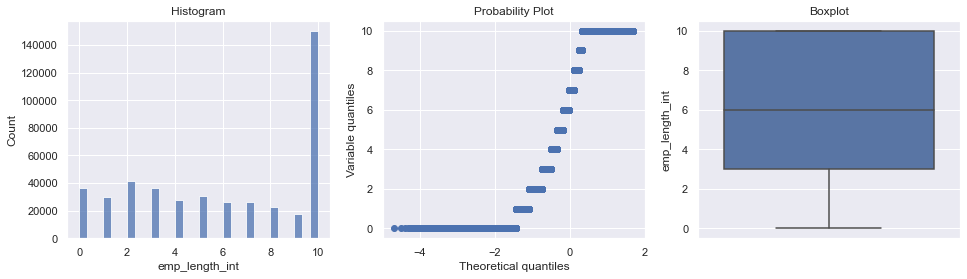

In [42]:
sns.set()
diagnostic_plots(loan_data, 'emp_length_int')

Note: The statistics looks good to me, no anomaly.

In [43]:
#this column can be used to generate a useful feature later
loan_data['earliest_cr_line']

42516        NaN
39785     Oct-03
42512     Jan-96
42513     Jul-04
42514        NaN
           ...  
237520    Jul-85
237519    Nov-92
237518    Jul-87
237496    Sep-04
233142    Jun-94
Name: earliest_cr_line, Length: 466285, dtype: object

In [44]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

#### <u>Remove columns which have only 1 unique value - in brief, carries no information value</u>

In [45]:
loan_data.nunique()

loan_amnt                        1352
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
purpose                            14
addr_state                         50
dti                              3997
delinq_2yrs                        24
earliest_cr_line                  664
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc   

In [46]:
loan_data.shape

(466285, 40)

In [47]:
loan_data = loan_data.loc[:,loan_data.apply(func=pd.Series.nunique, args=(False)) > 1]

In [48]:
loan_data.shape

(466285, 39)

Note: Column "application_type" has been removed.

In [49]:
nulls = pd.DataFrame(round(loan_data.isnull().sum()/len(loan_data.index)*100,2),columns=['null_percent'])
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
mths_since_last_record,86.57
mths_since_last_major_derog,78.77
mths_since_last_delinq,53.69
next_pymnt_d,48.73
total_rev_hi_lim,15.07
tot_cur_bal,15.07
tot_coll_amt,15.07
emp_title,5.92
emp_length,4.51
emp_length_int,4.51


In [50]:
loan_data['delinq_2yrs'].head()

42516    NaN
39785    1.0
42512    0.0
42513    0.0
42514    NaN
Name: delinq_2yrs, dtype: float64

In [51]:
loan_data['inq_last_6mths'].head()

42516    NaN
39785    0.0
42512    4.0
42513    0.0
42514    NaN
Name: inq_last_6mths, dtype: float64

#### <u>Preprocess discrete columns</u>

Following discrete variables: grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status will be processed.

In [52]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
# We create dummy variables from all 8 original independent variables, and save them into a list.

In [53]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [54]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [55]:
loan_data.columns.values

array(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'next_pymnt_d',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'term_int', 'issue_d_date',
       'issue_d_year', 'issue_d_month', 'emp_length_int', 'grade:A',
       'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
       'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3', 'sub_grade:A4',
       'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2', 'sub_grade:B3',
       'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1', 'sub_grade:C2',
       'sub_grade:C3', 

#### <u>Fixing some of the null issues</u>

In [56]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
# We fill the missing values with the mean value of the non-missing values.

In [57]:
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

In [58]:
nulls = pd.DataFrame(round(loan_data.isnull().sum()/len(loan_data.index)*100,2),columns=['null_percent'])
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
mths_since_last_record,86.57
mths_since_last_major_derog,78.77
mths_since_last_delinq,53.69
next_pymnt_d,48.73
tot_coll_amt,15.07
tot_cur_bal,15.07
total_rev_hi_lim,15.07
emp_title,5.92
emp_length,4.51
revol_util,0.07


### Exploratory Data Analysis(EDA)

Firstly, look into the label which we are trying to predict.

In [59]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [60]:
#display the various type of possible label in percentage point
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Distribution of Loan Status')

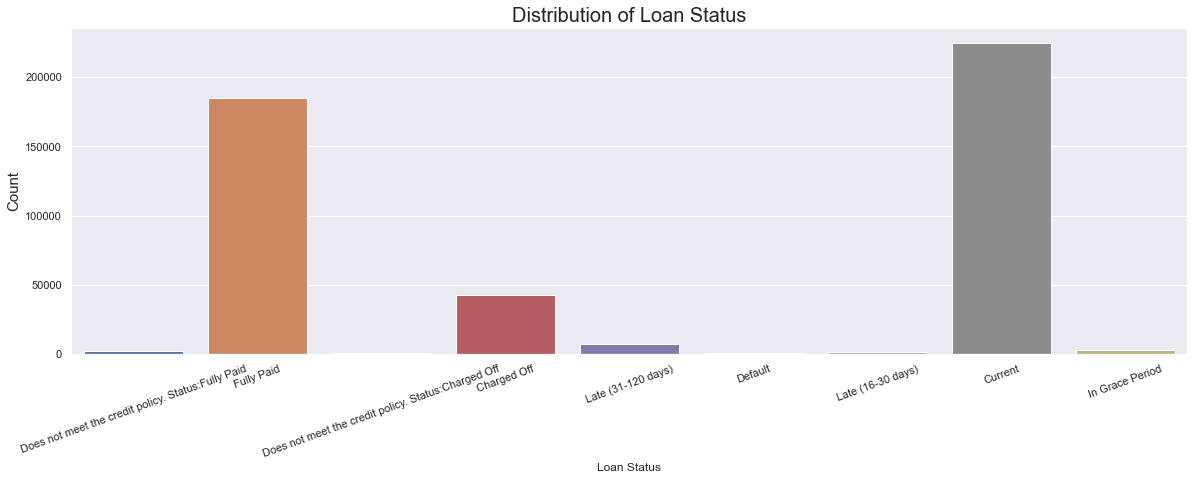

In [61]:
sns.set()
plt.figure(figsize = (20,6))
g = sns.countplot(x="loan_status", data=loan_data)
g.set_xticklabels(g.get_xticklabels(),rotation=20)
g.set_xlabel("Loan Status", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Distribution of Loan Status", fontsize=20)

Specific to the problem statement, my goal is to build a classification model to predict the likelihood of borrower going default, which is not a multi-classification problem.  Here, I will categorize "Charged Off", "Late (31-120 days)", "Default", "Does not meet the credit policy. Status:Charged Off" as 0 and the rest of 1 which is in good credit stand. 

In [62]:
loan_data['target'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']), 1, 0)

In [63]:
loan_data['target'].unique()

array([0, 1])

In [64]:
loan_data.groupby('issue_d_month')['target'].mean()

issue_d_month
2007-06    0.125000
2007-07    0.111111
2007-08    0.270270
2007-09    0.245283
2007-10    0.323810
             ...   
2014-08    0.079834
2014-09    0.077032
2014-10    0.069594
2014-11    0.059272
2014-12    0.051615
Freq: M, Name: target, Length: 91, dtype: float64

In [65]:
default_rate_2007_2011 = loan_data[loan_data['issue_d_month'].dt.year<=2011].groupby('issue_d_month')['target'].mean()
default_rate_2012_2014 = loan_data[loan_data['issue_d_month'].dt.year>2011].groupby('issue_d_month')['target'].mean()

In [66]:
default_rate_2007_2011.index

PeriodIndex(['2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11',
             '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05',
             '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11',
             '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05',
             '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11',
             '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
             '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
             '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
             '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
             '2011-12'],
            dtype='period[M]', name='issue_d_month', freq='M')

<AxesSubplot:xlabel='issue_d_month'>

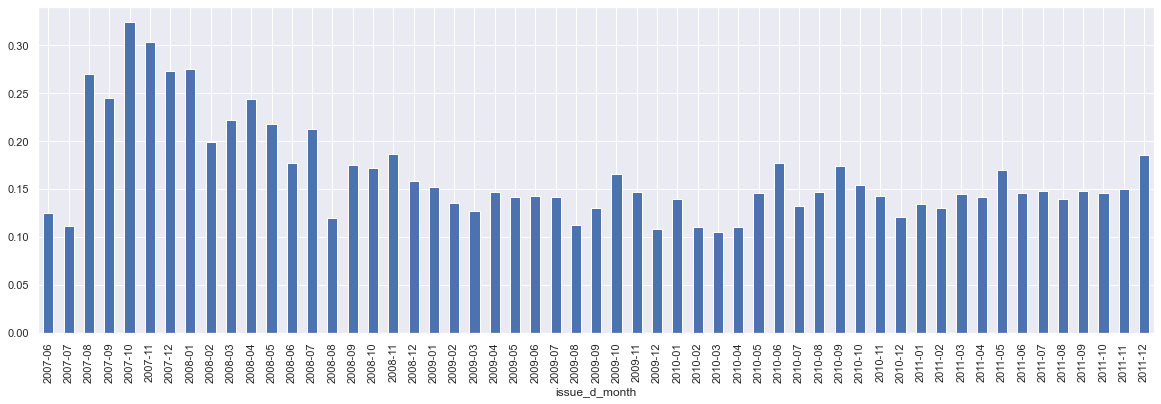

In [67]:
sns.set()
plt.figure(figsize = (20,6))
default_rate_2007_2011.plot(kind="bar")

<AxesSubplot:xlabel='issue_d_month'>

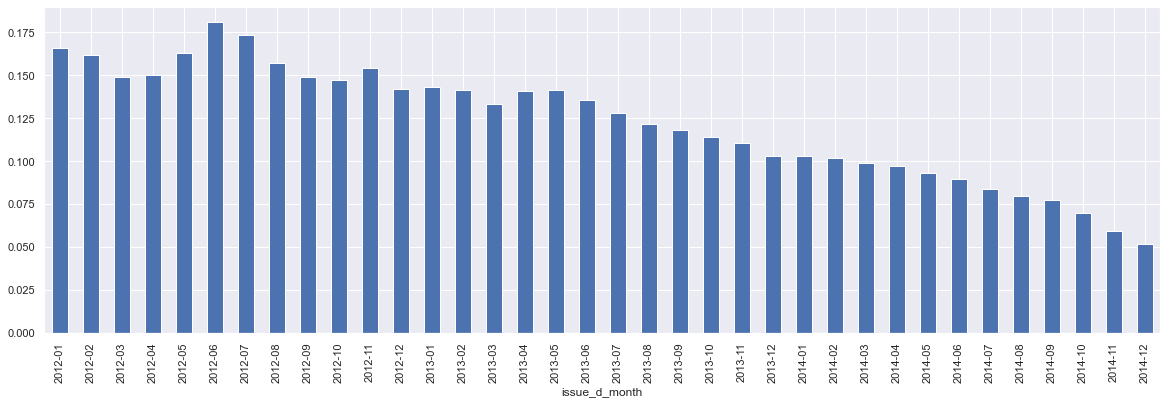

In [68]:
sns.set()
plt.figure(figsize = (20,6))
default_rate_2012_2014.plot(kind="bar")

In [69]:
interest_rate_average = loan_data.groupby('issue_d_month')['int_rate'].mean()
interest_rate_average

issue_d_month
2007-06     9.814583
2007-07    11.158571
2007-08    11.543514
2007-09    12.463208
2007-10    12.438476
             ...    
2014-08    13.894168
2014-09    13.393583
2014-10    13.300489
2014-11    13.096061
2014-12    12.708602
Freq: M, Name: int_rate, Length: 91, dtype: float64

<AxesSubplot:xlabel='issue_d_month'>

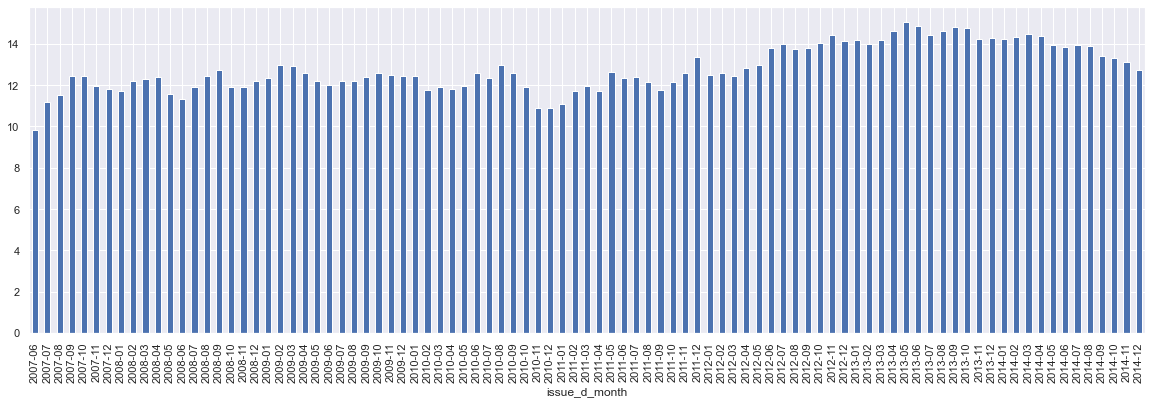

In [70]:
sns.set()
plt.figure(figsize = (20,6))
interest_rate_average.plot(kind="bar")

In [71]:
dti_rel = loan_data.groupby("dti", as_index=False).agg(
    Total=("target","size"),
    Afflicted=("target","sum"),
    Rate=("target","mean"))
dti_rel

,dti,Total,Afflicted,Rate
0,0.00,363,61,0.168044
1,0.01,9,2,0.222222
2,0.02,9,1,0.111111
3,0.03,4,0,0.000000
4,0.04,5,0,0.000000
...,...,...,...,...
3992,39.95,5,1,0.200000
3993,39.96,4,0,0.000000
3994,39.97,6,0,0.000000
3995,39.98,5,1,0.200000


<AxesSubplot:xlabel='dti', ylabel='Rate'>

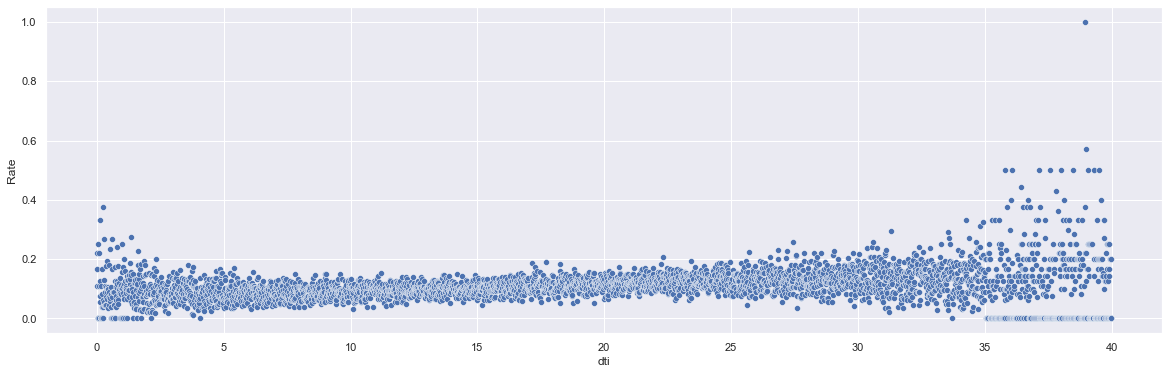

In [73]:
sns.set()
plt.figure(figsize = (20,6))
sns.scatterplot(data=dti_rel, x="dti", y="Rate")

debt_consolidation    59.0
credit_card           22.0
home_improvement       6.0
other                  5.0
major_purchase         2.0
small_business         2.0
car                    1.0
medical                1.0
moving                 1.0
vacation               1.0
wedding                1.0
house                  0.0
educational            0.0
renewable_energy       0.0
Name: purpose, dtype: float64 2


loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,
car,425,1876,5,13,51,2966,16,7,38
credit_card,7380,55892,161,69,271,38169,625,219,1371
debt_consolidation,25835,133134,544,292,808,106441,1976,767,4398
educational,56,0,0,32,65,269,0,0,0
home_improvement,2126,12453,30,71,143,11076,193,67,378
house,267,714,6,11,33,1182,18,4,34
major_purchase,808,3790,9,23,100,4912,64,23,99
medical,523,1856,8,22,36,2054,32,8,63
moving,393,1079,6,15,31,1404,15,8,43


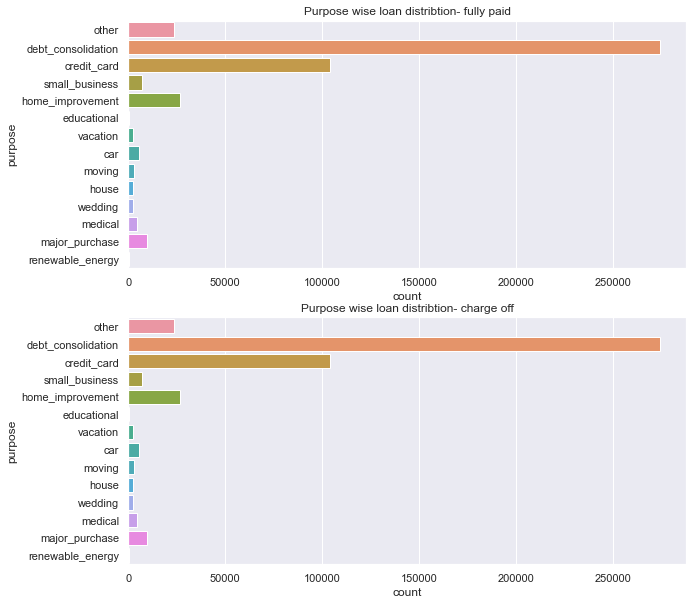

In [74]:
print(round(loan_data.purpose.value_counts(normalize=True)*100),2)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Purpose wise loan distribtion- fully paid')
sns.countplot(y="purpose", data=loan_data)
plt.subplot(212)
plt.title('Purpose wise loan distribtion- charge off')
sns.countplot(y="purpose", data=loan_data)
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(loan_data['purpose'], loan_data['loan_status']).style.background_gradient(cmap = cm)

C:\Users\weeho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


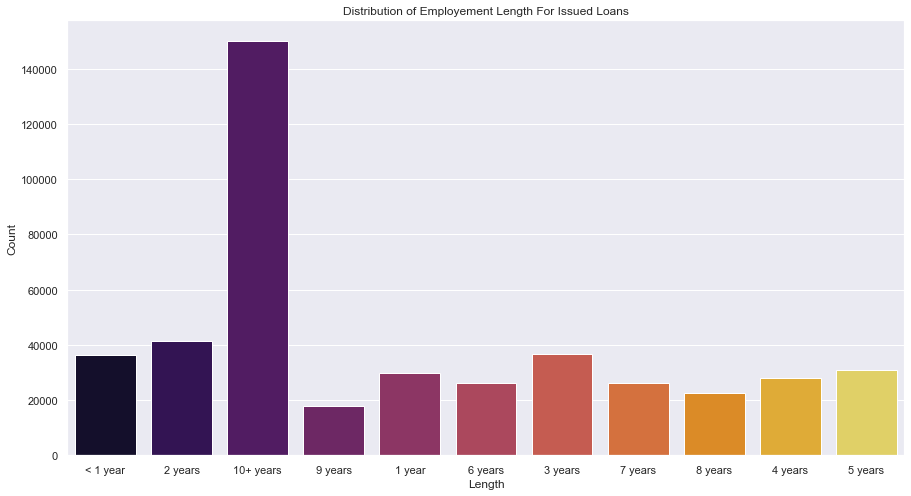

In [75]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(loan_data['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

Note: From the plot, it can be seen that people who have worked for 10 or more years are more likely to take a loan.

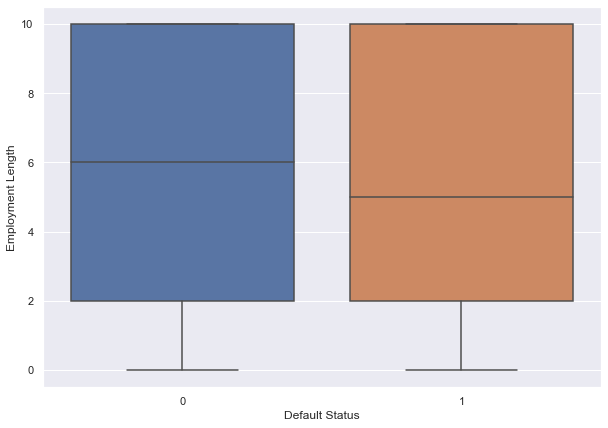

In [76]:
sns.set()
plt.figure(figsize = (10,7))
sns.boxplot(x=loan_data['target'], y=loan_data['emp_length_int'])
plt.xlabel('Default Status')
plt.ylabel('Employment Length')
plt.show()

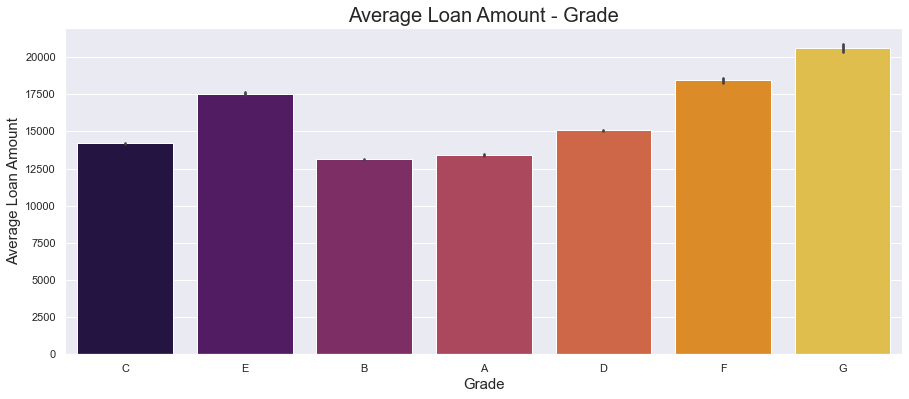

In [77]:
loan_grades = loan_data.groupby("grade").mean().reset_index()
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='grade', y='loan_amnt', data=loan_data, palette='inferno')
plt.title("Average Loan Amount - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Average Loan Amount", fontsize=15);

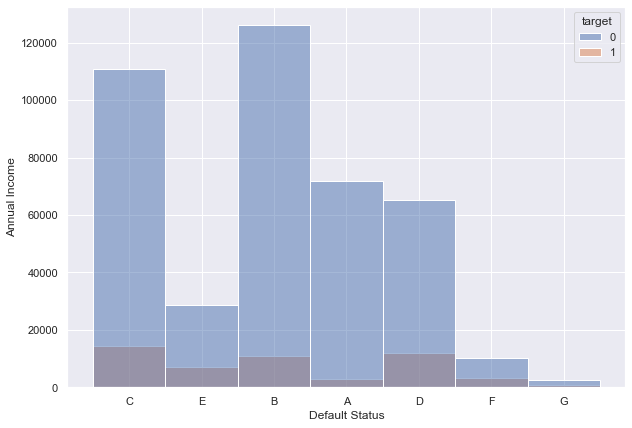

In [78]:
plt.figure(figsize = (10,7))
sns.histplot(data=loan_data, x='grade', hue='target', bins=25)
plt.xlabel('Default Status')
plt.ylabel('Annual Income')
plt.show()

In [79]:
loan_data[['int_rate', 'target']]

,int_rate,target
42516,10.91,0
39785,13.75,0
42512,10.59,0
42513,9.64,0
42514,9.01,0
...,...,...
237520,6.49,0
237519,8.67,0
237518,12.99,0
237496,11.99,0


In [80]:
loan_data['int_rate'].dtype

dtype('float64')

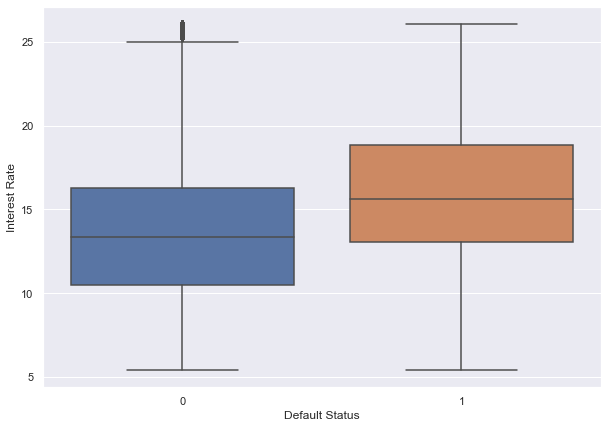

In [81]:
plt.figure(figsize = (10,7))
sns.boxplot(x=loan_data['target'], y=loan_data['int_rate'])
plt.xlabel('Default Status')
plt.ylabel('Interest Rate')
plt.show()

In [82]:
interest_rate_rel = loan_data.groupby("int_rate", as_index=False).agg(
    Total=("target","size"),
    Afflicted=("target","sum"),
    Rate=("target","mean"))
interest_rate_rel

,int_rate,Total,Afflicted,Rate
0,5.42,573,20,0.034904
1,5.79,410,16,0.039024
2,5.99,347,19,0.054755
3,6.00,100,2,0.020000
4,6.03,9846,177,0.017977
...,...,...,...,...
501,25.80,715,182,0.254545
502,25.83,576,134,0.232639
503,25.89,428,113,0.264019
504,25.99,277,62,0.223827


<AxesSubplot:xlabel='int_rate', ylabel='Rate'>

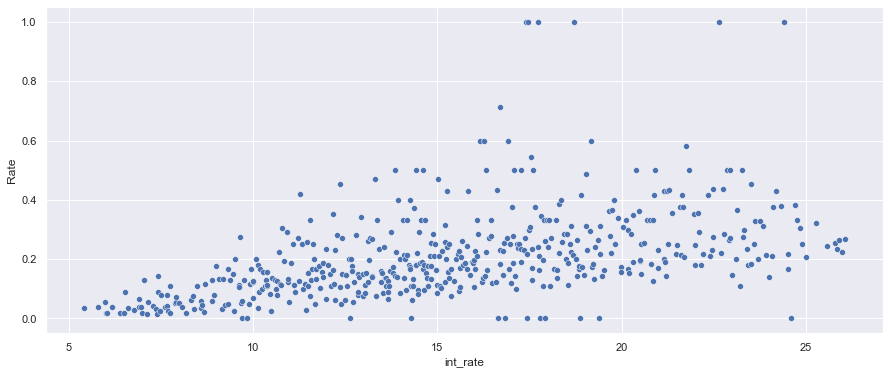

In [83]:
sns.scatterplot(data=interest_rate_rel, x="int_rate", y="Rate")

In [84]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_int,issue_d_date,issue_d_year,issue_d_month,emp_length_int,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,target
42516,1400,36 months,10.91,45.78,C,C3,"Stanford University Libraries, LOCKSS Project",< 1 year,RENT,40000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,other,MO,8.61,0.0,NaT,0.0,NaN,NaN,0.0,0.0,0,NaN,0.0,f,Aug-10,NaN,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
39785,7500,36 months,13.75,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,debt_consolidation,MA,14.29,1.0,2003-10-01,0.0,11.0,0.0,7.0,0.0,4175,51.5,8.0,f,NaN,NaN,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42512,6000,36 months,10.59,195.28,C,C2,Yale University,< 1 year,RENT,20000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,CT,12.90,0.0,1996-01-01,4.0,45.0,0.0,5.0,0.0,13660,66.0,6.0,f,Jul-10,NaN,0.0,NaN,NaN,NaN,36,2007-06-01,2007,2007-06,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,

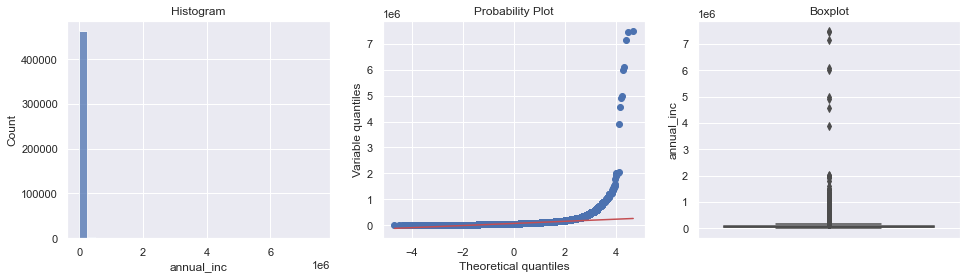

In [85]:
diagnostic_plots(loan_data, 'annual_inc')

In [87]:
loan_data['annual_inc'].describe()

count    4.662850e+05
mean     7.327738e+04
std      5.496333e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895300e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

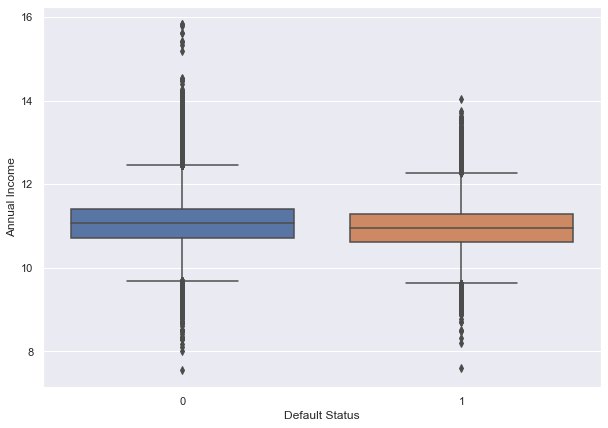

In [88]:
plt.figure(figsize = (10,7))
sns.boxplot(x=loan_data['target'], y=np.log(loan_data['annual_inc']))
plt.xlabel('Default Status')
plt.ylabel('Annual Income')
plt.show()

Note: As the range of annual income is too spread out, I need to perform a log on it.  From the boxplot, it seems to indicate that borrower defaulting seems to be on the lower range of annual salary.

Explain this changing of target

In [89]:
loan_data['target'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [90]:
loan_data.to_pickle('./data/loan_data_clean.pk1')